In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    X = np.array(df["sentence"])
    Y = np.array(df["label"], dtype=int)
    return X, Y


In [3]:
X_train, Y_train = read_csv("/content/dataset/train.csv")
X_test, Y_test = read_csv("/content/dataset/test.csv")

In [4]:
index = 24
print(X_train[index], Y_train[index])

candy is life  2


In [5]:
def label_to_emoji(label):
   emojies = ["💖","⚾","😄","😔","🍴"]
   return emojies[label]

In [6]:
index = 24
X_train[index], label_to_emoji(Y_train[index])

('candy is life ', '😄')

In [7]:
# Number of labels
unique, counts = np.unique(Y_train, return_counts=True)
print(unique)
print(counts)

[0 1 2 3 4]
[22 19 38 36 17]


In [8]:
# The longest sentence
max(X_train, key=len)

'I am so impressed by your dedication to this project'

In [9]:
max_len = len(max(X_train, key=len).split(" "))
max_len

10

In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

In [11]:
!unzip -q glove.6B.zip -d glove.6B

In [12]:
f = open("/content/glove.6B/glove.6B.300d.txt", encoding="utf-8")

word_vectors = {}
for line in f:
  line = line.strip().split()
  word = line[0]
  vector =np.array(line[1:], dtype=np.float64)
  word_vectors[word] = vector


In [ ]:
word_vectors["khadijeh"]

In [14]:
def sentence_to_avg(sentence):

  try:
      sentence = sentence.lower()
      words = sentence.strip().split(" ")
      sum_vectors = np.zeros((300, ))
      for word in words:
        sum_vectors += word_vectors[word]

      avg_vectors = sum_vectors / len(words)
      return avg_vectors

  except:
    print(sentence)
    return None



In [ ]:
sentence_to_avg("i love programming too much")

In [16]:
X_train_avg = []
for x_train in X_train:
  X_train_avg.append(sentence_to_avg(x_train))

X_train_avg = np.array(X_train_avg)

X_train_avg.shape

(132, 300)

In [ ]:
Y_train_one_hot = tf.keras.utils.to_categorical(Y_train, num_classes=5)
Y_train_one_hot

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, input_shape=(300,), activation="softmax")
])

In [19]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [20]:
output=model.fit(X_train_avg, Y_train_one_hot, epochs=280)

Epoch 1/280
5/5 [==============================] - 2s 13ms/step - loss: 1.5792 - accuracy: 0.3106
Epoch 2/280
5/5 [==============================] - 0s 4ms/step - loss: 1.5264 - accuracy: 0.3182
Epoch 3/280
5/5 [==============================] - 0s 3ms/step - loss: 1.4867 - accuracy: 0.3182
Epoch 4/280
5/5 [==============================] - 0s 3ms/step - loss: 1.4511 - accuracy: 0.3864
Epoch 5/280
5/5 [==============================] - 0s 4ms/step - loss: 1.4189 - accuracy: 0.3939
Epoch 6/280
5/5 [==============================] - 0s 3ms/step - loss: 1.3900 - accuracy: 0.4091
Epoch 7/280
5/5 [==============================] - 0s 4ms/step - loss: 1.3623 - accuracy: 0.4621
Epoch 8/280
5/5 [==============================] - 0s 3ms/step - loss: 1.3360 - accuracy: 0.5152
Epoch 9/280
5/5 [==============================] - 0s 3ms/step - loss: 1.3116 - accuracy: 0.4924
Epoch 10/280
5/5 [==============================] - 0s 4ms/step - loss: 1.2892 - accuracy: 0.5227
Epoch 11/280
5/5 [==========

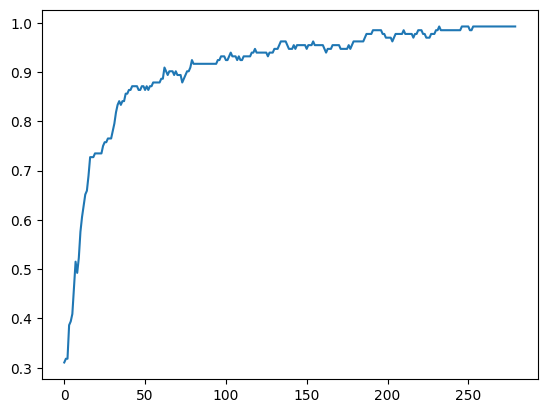

In [21]:
plt.plot(output.history['accuracy'])
plt.show()

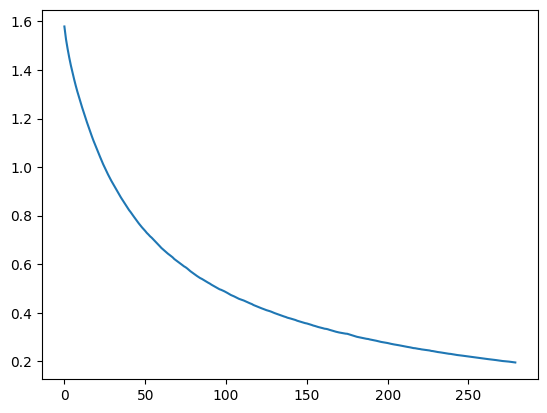

In [22]:
plt.plot(output.history['loss'])
plt.show()

In [23]:

my_test ="I like food"
my_test_avg = sentence_to_avg(my_test)
my_test_avg = np.array([my_test_avg])
result = model.predict(my_test_avg)
y_perd = np.argmax(result)
label_to_emoji(y_perd)

1/1 [==============================] - 0s 63ms/step


'🍴'

In [24]:
my_test ="We play tennis"
my_test_avg = sentence_to_avg(my_test)
my_test_avg = np.array([my_test_avg])
result = model.predict(my_test_avg)
y_perd = np.argmax(result)
print(my_test)
label_to_emoji(y_perd)

1/1 [==============================] - 0s 35ms/step
We play tennis


'⚾'

In [25]:
my_test ="I hate you"
my_test_avg = sentence_to_avg(my_test)
my_test_avg = np.array([my_test_avg])
result = model.predict(my_test_avg)
y_perd = np.argmax(result)
print(my_test)
label_to_emoji(y_perd)

1/1 [==============================] - 0s 28ms/step
I hate you


'😔'

In [26]:

my_test ="Thank you very much"
my_test_avg = sentence_to_avg(my_test)
my_test_avg = np.array([my_test_avg])
result = model.predict(my_test_avg)
y_perd = np.argmax(result)
print(my_test)
label_to_emoji(y_perd)

1/1 [==============================] - 0s 26ms/step
Thank you very much


'😄'

In [28]:
my_test ="you made me happy"
my_test_avg = sentence_to_avg(my_test)
my_test_avg = np.array([my_test_avg])
result = model.predict(my_test_avg)
y_perd = np.argmax(result)
print(my_test)
label_to_emoji(y_perd)

1/1 [==============================] - 0s 28ms/step
you made me happy


'😄'

In [29]:
my_test ="my honey"
my_test_avg = sentence_to_avg(my_test)
my_test_avg = np.array([my_test_avg])
result = model.predict(my_test_avg)
y_perd = np.argmax(result)
print(my_test)
label_to_emoji(y_perd)

1/1 [==============================] - 0s 29ms/step
my honey


'💖'